# 과제

## 코로나19 감염자 분석

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
plt.rcParams['font.weight'] = 'regular'
plt.rcParams['figure.figsize'] = 15,10

In [10]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn]))) import io
df = pd.read_csv(io.StringIO(uploaded['covid19_patient.csv'].decode('cp949')), dtype = str)
df.head()

Saving covid19_patient.csv to covid19_patient (4).csv
User uploaded file "covid19_patient.csv" with length 488859 bytes


,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [11]:
df.columns

Index(['patient_id', 'sex', 'age', 'country', 'province', 'city',
       'infection_case', 'infected_by', 'contact_number', 'symptom_onset_date',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')

In [12]:
df['count']= 1  # 집계를 위한 카운트 값 할당
df.columns

Index(['patient_id', 'sex', 'age', 'country', 'province', 'city',
       'infection_case', 'infected_by', 'contact_number', 'symptom_onset_date',
       'confirmed_date', 'released_date', 'deceased_date', 'state', 'count'],
      dtype='object')

In [13]:
df.country.unique()

array(['Korea', 'China', 'United States', 'France', 'Thailand', 'Canada',
       'India', 'Switzerland', 'Germany', 'Indonesia', 'Vietnam',
       'Foreign', 'Mongolia', 'United Kingdom', 'Spain', 'Bangladesh'],
      dtype=object)

In [14]:
# 그룹 연산자를 이용한 카운트
df.groupby('country').count()[['patient_id']]

,patient_id
country,
Bangladesh,5
Canada,1
China,11
Foreign,7
France,1
Germany,1
India,1
Indonesia,2
Korea,5123


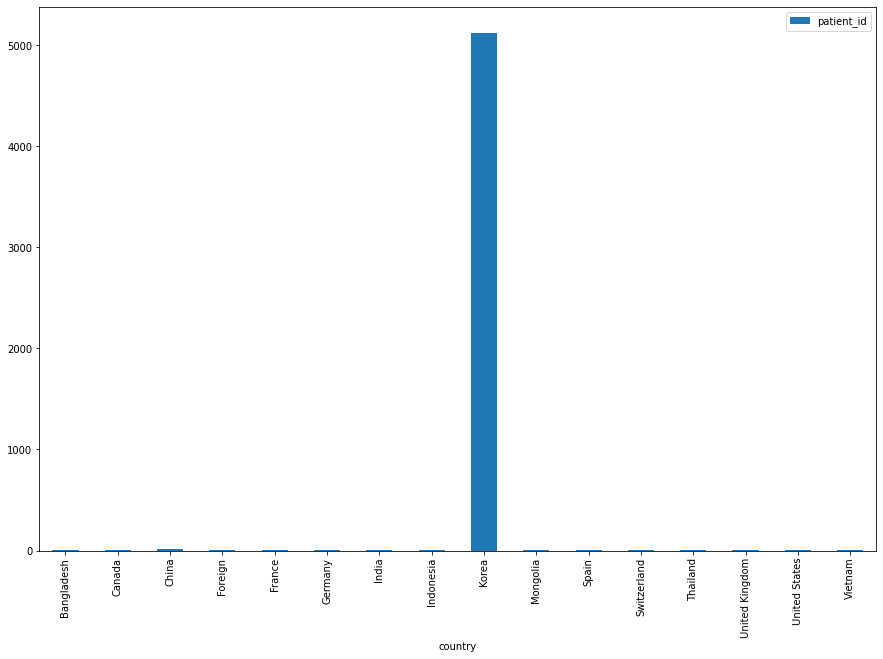

In [15]:
# Bar 차트로 확인
df.groupby('country').count()[['patient_id']].plot(kind='bar')

In [16]:
# 감염경로/ 사유 분석
df.groupby('infection_case').sum()[['count']].sort_values('count',ascending=False)

,count
infection_case,
contact with patient,1610
overseas inflow,840
etc,703
Itaewon Clubs,162
Richway,128
Guro-gu Call Center,112
Shincheonji Church,107
Coupang Logistics Center,80
Yangcheon Table Tennis Club,44


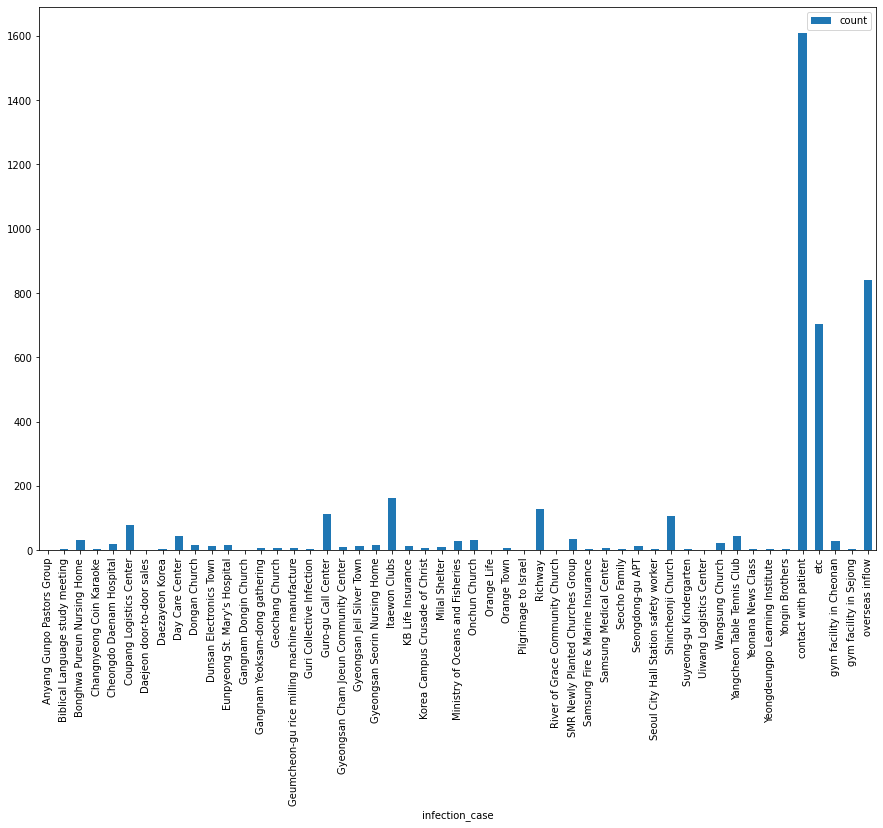

In [17]:
# 아랫 정렬 -> count 기준으로 ascending= False를 통해 가능
df.groupby('infection_case').sum()[['count']].plot(kind='bar')

In [18]:
# 한국에서 각 지역별 코로나 감염자 수 정렬
korea_df = df[df['country'] == 'Korea'].copy()
korea_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5123 entries, 0 to 5161
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5123 non-null   object
 1   sex                 4005 non-null   object
 2   age                 3747 non-null   object
 3   country             5123 non-null   object
 4   province            5123 non-null   object
 5   city                5030 non-null   object
 6   infection_case      4210 non-null   object
 7   infected_by         1343 non-null   object
 8   contact_number      773 non-null    object
 9   symptom_onset_date  687 non-null    object
 10  confirmed_date      5120 non-null   object
 11  released_date       1573 non-null   object
 12  deceased_date       65 non-null     object
 13  state               5123 non-null   object
 14  count               5123 non-null   int64 
dtypes: int64(1), object(14)
memory usage: 640.4+ KB


In [19]:
# 한국 지역별 감염자 수 통계
korea_df.groupby('city').count()[['patient_id']]

,patient_id
city,
Andong-si,53
Ansan-si,33
Anseong-si,4
Anyang-si,63
Asan-si,17
...,...
Yongin-si,104
Yongsan-gu,50
Yuseong-gu,40


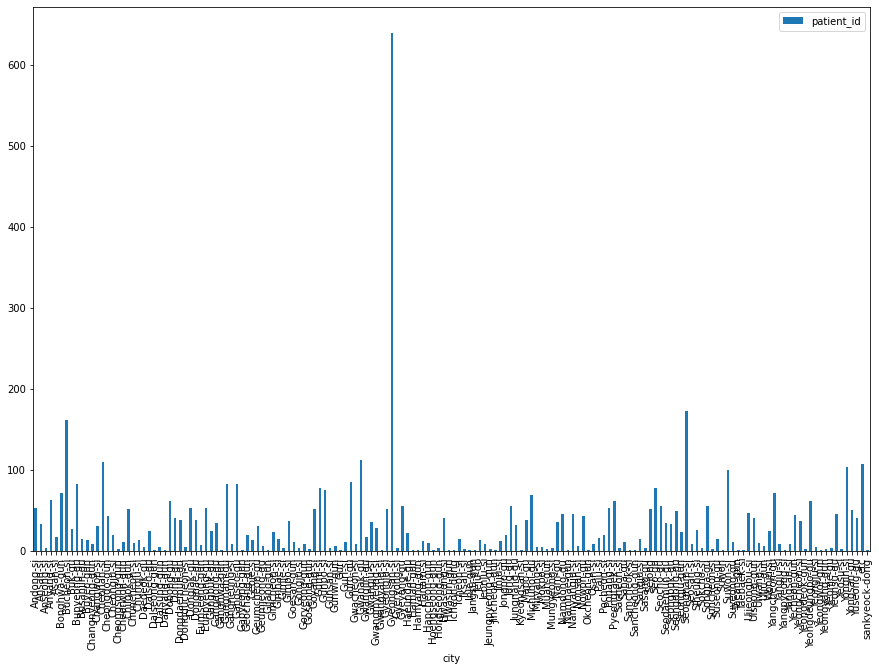

In [20]:
# 한국 지역별 감염자수 차트로 확인
korea_df.groupby('city').count()[['patient_id']].plot(kind='bar')

In [21]:
# 확진자 기준 집계 생성
korea_df.loc[korea_df.contact_number == '-','contact_number'] = 0
korea_df[['contact_number']] = korea_df[['contact_number']].fillna(0).astype(int)
#print(korea_df['contact_number'].cumsum().head(810))
# 810 쯤 엄청난 contact_number가 등장함을 볼 수 있음 --> 전처리 필요
korea_df[['contact_number']] = korea_df.contact_number.apply(lambda x : 100 if x > 10000 else x)

rf = korea_df.groupby('confirmed_date').sum()[['count','contact_number']]

# 사망자 집계
rf['dead'] = korea_df.groupby('deceased_date').sum()[['count']]
rf[['dead']] = rf[['dead']].fillna(0).astype(int)
rf = rf[['count','dead','contact_number']]
# 확진자 누적
rf['total_dead'] = rf['dead'].cumsum()
# 사망자 누적
rf['total_count'] = rf['count'].cumsum()
# 접촉자 누적
rf['total_contact'] = rf['contact_number'].cumsum()

rf

,count,dead,contact_number,total_dead,total_count,total_contact
confirmed_date,,,,,,
2020-01-23,1,0,75,0,1,75
2020-01-26,1,0,16,0,2,91
2020-01-27,1,0,95,0,3,186
2020-01-30,4,0,170,0,7,356
2020-01-31,3,0,45,0,10,401
...,...,...,...,...,...,...
2020-06-26,40,0,16,65,5002,12565
2020-06-27,48,0,85,65,5050,12650
2020-06-28,38,0,84,65,5088,12734


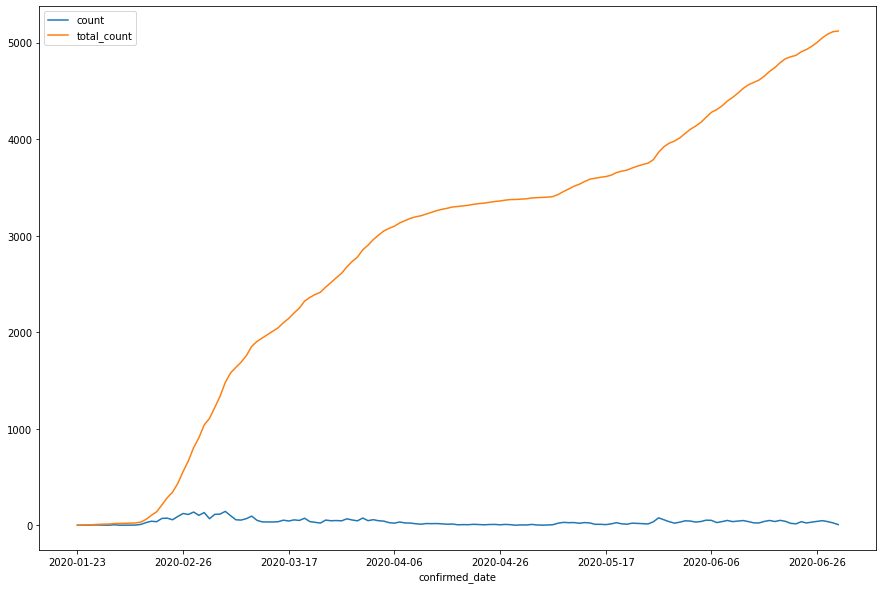

In [22]:
# 일별 확진자와 누적 확진자 현황
rf[['count','total_count']].plot()

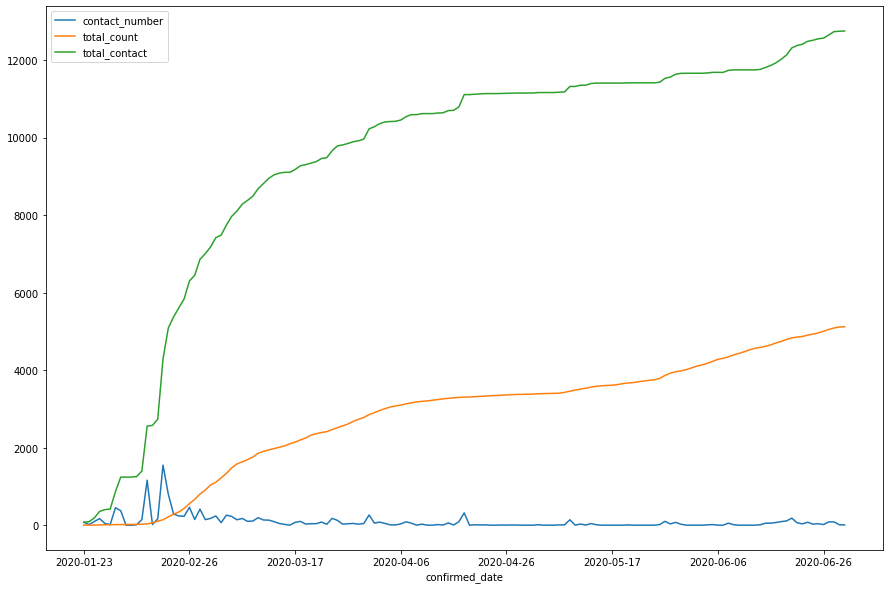

In [23]:
# 일별 접촉자와 누적 확진자, 누적 접촉자 현황
rf[['contact_number','total_count','total_contact']].plot()